<a href="https://colab.research.google.com/github/soongjamm/Machine-Learning-Learning/blob/master/Tensorflow/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.3.0
current dir =  /content/gdrive/My Drive/Colab Notebooks/dataset
loaded_data.shape =  (768, 9)
training_x_data.shape =  (538, 8)
training_t_data.shape =  (538, 1)
test_x_data.shape =  (230, 8)
test_t_data.shape =  (230, 1)
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
14/14 - 0s - loss: 29.4402 - accuracy: 0.5419 - val_loss: 17.0977 - val_accuracy: 0.4815
Epoch 2/500
14/14 - 0s - loss: 24.9782 - accuracy: 0.5721 - val_loss: 21.2622 - val_accuracy: 0.6389
Epoch 3/500
14/14 - 0s - loss: 30.7758 - accuracy: 0.5628 - val_loss: 32.5482 - val_accuracy: 0.6574
Epoch 4/500
14/14 - 0s - loss: 26.5900 - accuracy: 0.5326 - val_loss: 40.0398 - val_accuracy: 0.6574
Epoch 5/500
14/14 - 0

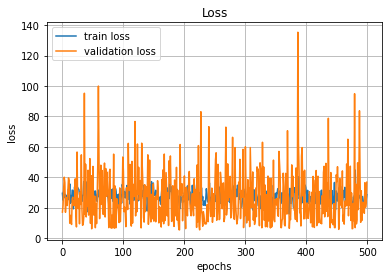

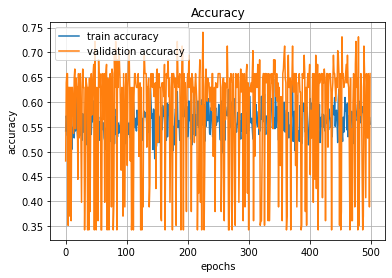

In [42]:
# Google Drive 에 저장되어 있는 diabetes,csv 파일을 읽어들이기 위해서
# Colab 의 /content/gdrive/ 에 Google Drive 마운트 시킴

from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

# [1] Colab에 Google Drive 마운트
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

# Colab의 /content/gdrive/에 Google Drive 마운트 시킴
from google.colab import drive

drive.mount('/content/gdrive/')

# [2] Google Drive내의 working directory 이동

import os

working_dir = 'dataset'

# Google Drive에서 Colab Default Directory
# gdrive까지 Colab, MyDrive부터는 Google Drive
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'
original_dir = os.getcwd() # save current dir

try:
  os.chdir(colab_default_dir) # Google Drive의 Colab 기본 디렉토리로 이동

  if not os.path.exists(working_dir):
    os.mkdir(working_dir)
  
  os.chdir(working_dir) # change working dir.
  print('current dir = ', os.getcwd())

except Exception as err:

  os.chdir(original_dir)
  print(str(err))

# [3] Training Data 생성 (diabetes.csv)
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    # training data / test data 분리

    seperation_rate = 0.3  # 분리 비율
    test_data_num = int(len(loaded_data) * seperation_rate)

    np.random.shuffle(loaded_data)

    test_data = loaded_data[ 0:test_data_num ]
    training_data = loaded_data[ test_data_num: ]

    # training_x_data / training_t__data 생성

    training_x_data = training_data[ :, 0:-1]
    training_t_data = training_data[ :, [-1]]

    # test_x_data / test_t__data 생성
    test_x_data = test_data[ :, 0:-1]
    test_t_data = test_data[ :, [-1]]

    print("loaded_data.shape = ", loaded_data.shape)
    print("training_x_data.shape = ", training_x_data.shape)
    print("training_t_data.shape = ", training_t_data.shape)

    print("test_x_data.shape = ", test_x_data.shape)
    print("test_t_data.shape = ", test_t_data.shape)

except Exception as err:

    print(str(err))


# [4] 모델 구축
# Logistic Regression을 Keras 이용하여 생성
model = Sequential()

# 노드 1개인 출력층 생성
model.add(Dense(training_t_data.shape[1], 
                input_shape=(training_x_data.shape[1],),
                activation='sigmoid'))

# [5] 모델 컴파일
# 학습을 위한 optimizer, 손실함수 loss 정의
model.compile(optimizer=SGD(learning_rate=0.01),
              loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

# [6] 모델 학습
# validation_split=0.2 --> training data로 부터 20% 비율로 validation data 생성 후 overfitting 확인
from datetime import datetime

start_time = datetime.now()
hist = model.fit(training_x_data, training_t_data, epochs=500, validation_split=0.2, verbose=2)
end_time = datetime.now()
print('\nElapsed Time => ', end_time - start_time)

# [7] 모델 (정확도) 평가
model.evaluate(test_x_data, test_t_data) # 기본 batch_size = 32 이므로 총 24회 반복 (759 / 24 = 23.7)

# [8] 손실 및 모델 정확도
import matplotlib.pyplot as plt
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()
##
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

